In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
n_samples = 1000
time = np.arange(n_samples)

In [3]:
true_impulse_response = np.zeros(32)
true_impulse_response[5] = 0.8  # Phản xạ chính
true_impulse_response[6] = 0.5  # Phản xạ phụ
true_impulse_response[7] = 0.2
x = np.random.randn(n_samples)

In [4]:
# d(n) = x(n) * h(n)
d = np.convolve(x, true_impulse_response, mode='same')

In [5]:
filter_length = 32
w = np.zeros(filter_length)  # Khởi tạo trọng số bộ lọc bằng 0
mu = 0.01 # Bước nhảy (Learning rate)

e = np.zeros(n_samples)
y = np.zeros(n_samples)

In [6]:
for n in range(filter_length, n_samples):
    x_vector = x[n : n - filter_length : -1]
    # a. Dự đoán tiếng vọng: y(n) = w * x
    y[n] = np.dot(w, x_vector)
    # b. Tính sai số: e(n) = d(n) - y(n)
    e[n] = d[n] - y[n]
    # c. Cập nhật bộ lọc: w_moi = w_cu + mu * e * x
    w = w + mu * e[n] * x_vector

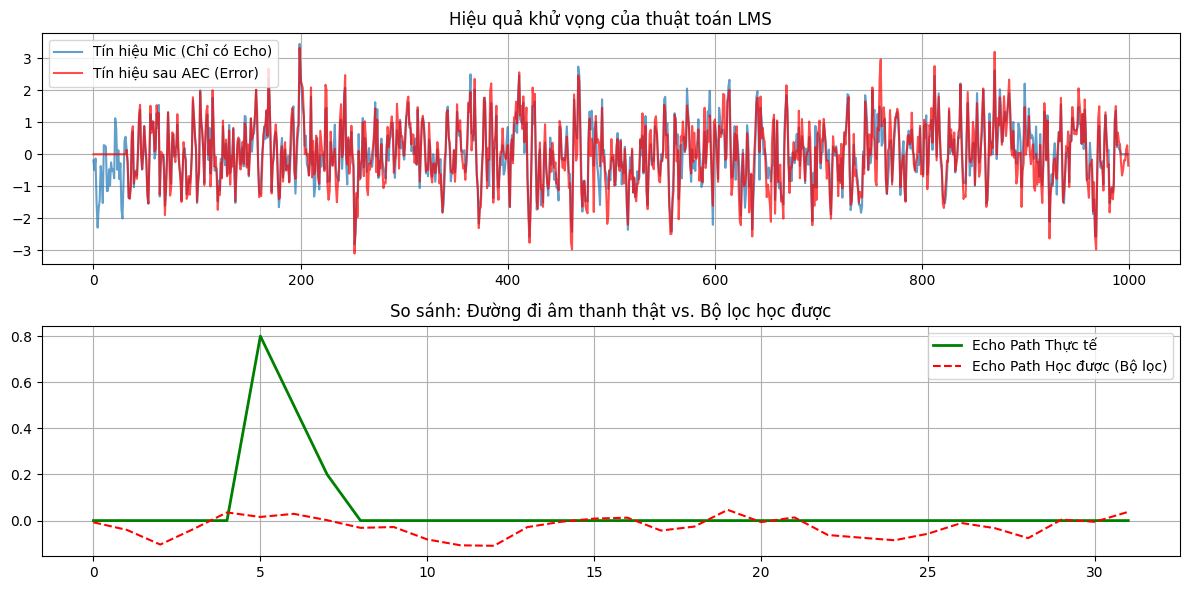

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(d, label='Tín hiệu Mic (Chỉ có Echo)', alpha=0.7)
plt.plot(e, label='Tín hiệu sau AEC (Error)', color='red', alpha=0.7)
plt.title('Hiệu quả khử vọng của thuật toán LMS')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(true_impulse_response, 'g-', label='Echo Path Thực tế', linewidth=2)
plt.plot(w, 'r--', label='Echo Path Học được (Bộ lọc)')
plt.title('So sánh: Đường đi âm thanh thật vs. Bộ lọc học được')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('lms_aec_simulation.png')